Training DataFrame Columns: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn', 'Male', 'Female']
Final model trained on the entire training dataset.

--- Training Set Classification Report ---
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    190833
         1.0       0.99      0.88      0.93    250000

    accuracy                           0.93    440833
   macro avg       0.93      0.93      0.93    440833
weighted avg       0.94      0.93      0.93    440833

Training Set ROC AUC: 0.9819



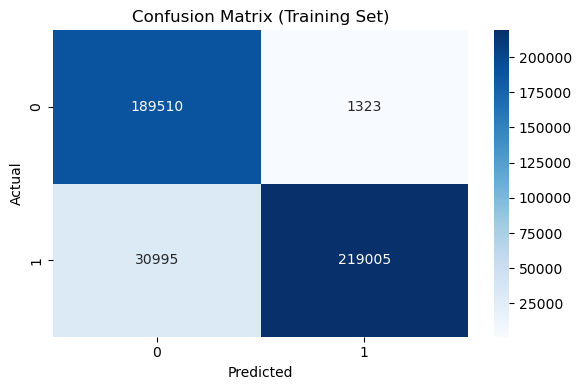

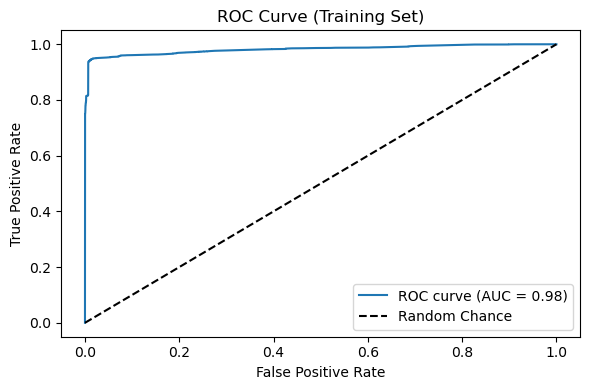

External Testing DataFrame Columns: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn', 'Male', 'Female']
--- External Test Set Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.20      0.33     33881
           1       0.53      0.98      0.68     30493

    accuracy                           0.57     64374
   macro avg       0.72      0.59      0.51     64374
weighted avg       0.73      0.57      0.50     64374

External Test Set ROC AUC: 0.7340



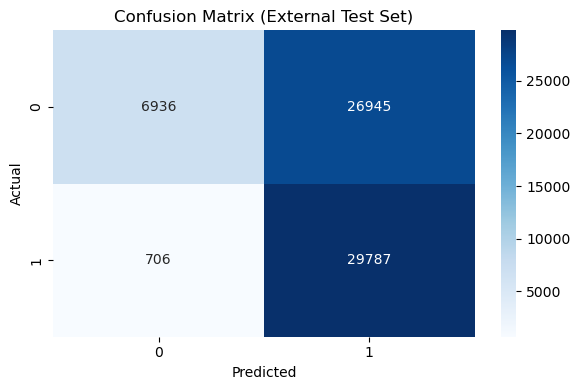

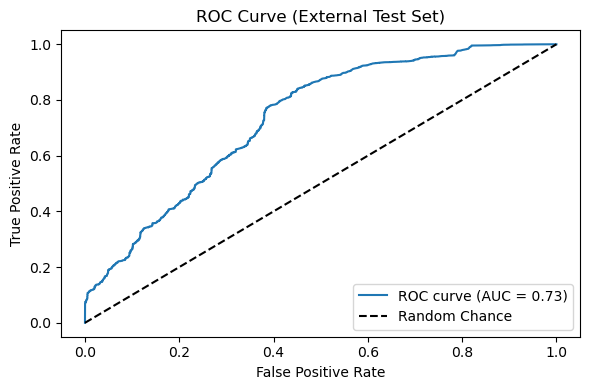

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def load_and_clean_data(file_path, target_col='Churn'):
    # Load data from CSV file
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    if 'CustomerID' in df.columns:
        df.drop(columns=['CustomerID'], inplace=True)
    return df

def train_model(X, y, n_estimators=100, max_depth=4, min_samples_leaf=3, max_features='sqrt'):
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X, y)
    print("Final model trained on the entire training dataset.\n")
    return model

def evaluate_model(model, X, y, set_name="Test Set"):
    # Predict on given dataset
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Print classification report
    print(f"--- {set_name} Classification Report ---")
    print(classification_report(y, y_pred))
    
    # Calculate and print ROC AUC
    auc = roc_auc_score(y, y_pred_proba)
    print(f"{set_name} ROC AUC: {auc:.4f}\n")
    
    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({set_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
    plt.title(f"ROC Curve ({set_name})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

def main():
    # -------------------------------
    # Training Phase
    # -------------------------------
    train_df = load_and_clean_data('cleaned_customer_churn_dataset_training.csv', target_col='Churn')
    print("Training DataFrame Columns:", train_df.columns.tolist())
    
    # Separate features and target
    X_train = train_df.drop(columns=['Churn'])
    y_train = train_df['Churn']
    
    # Train final model on the entire training dataset
    final_model = train_model(
        X_train, y_train, 
        n_estimators=100, 
        max_depth=4,      
        min_samples_leaf=3,
        max_features='sqrt'
    )
    
    evaluate_model(final_model, X_train, y_train, set_name="Training Set")

    external_df = load_and_clean_data('cleaned_customer_churn_dataset_testing.csv', target_col='Churn')
    print("External Testing DataFrame Columns:", external_df.columns.tolist())
    
    X_external = external_df.drop(columns=['Churn'])
    y_external = external_df['Churn']
    
    # Evaluate model on external test dataset
    evaluate_model(final_model, X_external, y_external, set_name="External Test Set")

if __name__ == "__main__":
    main()
